In [1]:
# Import our dependencies
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Imports for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import set_config

In [2]:
# import our input datasets
df_atl = pd.read_csv('../data/table_ATL.csv')
df_bos = pd.read_csv('../data/table_BOS.csv')
df_cha = pd.read_csv('../data/table_CHA.csv')
df_chi = pd.read_csv('../data/table_CHI.csv')
df_cle = pd.read_csv('../data/table_CLE.csv')
df_dal = pd.read_csv('../data/table_DAL.csv')
df_den = pd.read_csv('../data/table_DEN.csv')
df_det = pd.read_csv('../data/table_DET.csv')
df_gsw = pd.read_csv('../data/table_GSW.csv')
df_hou = pd.read_csv('../data/table_HOU.csv')
df_ind = pd.read_csv('../data/table_IND.csv')
df_lac = pd.read_csv('../data/table_LAC.csv')
df_lal = pd.read_csv('../data/table_LAL.csv')
df_mem = pd.read_csv('../data/table_MEM.csv')
df_mia = pd.read_csv('../data/table_MIA.csv')
df_mil = pd.read_csv('../data/table_MIL.csv')
df_min = pd.read_csv('../data/table_MIN.csv')
df_njn = pd.read_csv('../data/table_NJN.csv')
df_nop = pd.read_csv('../data/table_NOP.csv')
df_nyk = pd.read_csv('../data/table_NYK.csv')
df_okc = pd.read_csv('../data/table_OKC.csv')
df_orl = pd.read_csv('../data/table_ORL.csv')
df_phi = pd.read_csv('../data/table_PHI.csv')
df_pho = pd.read_csv('../data/table_PHO.csv')
df_por = pd.read_csv('../data/table_POR.csv')
df_sac = pd.read_csv('../data/table_SAC.csv')
df_sas = pd.read_csv('../data/table_SAS.csv')
df_tor = pd.read_csv('../data/table_TOR.csv')
df_uta = pd.read_csv('../data/table_UTA.csv')
df_was = pd.read_csv('../data/table_WAS.csv')

In [96]:
df_cha

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%
0,60,-0.173,-0.159,-0.160,0.001,-0.156,-0.165,0.004,-0.160,-0.158,...,-0.217,-0.181,-0.189,-0.159,-0.181,-0.222,-0.225,-0.203,-0.176,0.483
1,72,0.069,0.079,0.035,0.019,0.112,-0.006,0.039,0.065,0.062,...,0.150,0.129,0.134,0.082,-0.038,0.003,-0.122,-0.101,0.093,0.569
2,67,-0.180,-0.197,-0.194,-0.002,-0.246,-0.204,-0.018,-0.175,-0.187,...,-0.308,-0.208,-0.233,-0.242,-0.225,-0.186,-0.223,-0.199,-0.194,0.299
3,82,0.008,0.084,0.073,0.005,0.164,0.193,-0.009,0.051,0.004,...,0.285,0.049,0.100,0.088,0.058,0.204,0.095,0.203,0.097,0.354
4,82,-0.009,0.002,0.014,-0.005,0.258,0.190,0.019,-0.076,-0.065,...,-0.118,-0.036,-0.055,0.004,-0.051,-0.123,-0.014,0.077,0.002,0.293
5,82,0.003,-0.014,-0.001,-0.006,-0.106,-0.081,-0.009,0.017,0.040,...,0.240,0.008,0.053,-0.077,-0.100,-0.183,0.055,-0.050,0.003,0.524
6,82,0.005,0.015,0.033,-0.008,-0.004,0.081,-0.030,0.022,0.011,...,-0.050,0.062,0.038,-0.005,0.004,0.279,0.051,0.078,0.003,0.585
7,82,-0.005,0.020,0.002,0.008,0.065,0.017,0.017,0.004,-0.005,...,0.003,0.018,0.015,0.034,0.094,0.166,-0.067,-0.076,0.015,0.732
8,82,-0.001,-0.007,0.007,-0.006,0.088,0.113,-0.008,-0.036,-0.036,...,-0.059,-0.011,-0.022,0.017,0.024,-0.117,0.026,0.071,0.031,0.463
9,82,0.228,0.270,0.242,0.010,0.435,0.429,0.001,0.228,0.180,...,0.163,0.255,0.233,0.355,0.239,0.218,0.324,0.250,0.260,0.537


In [86]:
# Create testing and training data
train_df = df_bos.drop([0])
test_df = df_bos.head(3)

In [87]:
X_train = train_df.drop('W/L%',axis=1)
y_train = train_df['W/L%']

In [88]:
X_test = test_df.drop('W/L%',axis=1)
y_test = test_df['W/L%']

In [89]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
# Fit and check model accuracy score
rfr = RandomForestRegressor(random_state=42, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'R-squared training Score: {rfr.score(X_train_scaled, y_train)}')
print(f'R-squared testing Score: {rfr.score(X_test_scaled, y_test)}')

R-squared training Score: 0.8464716755564331
R-squared testing Score: 0.6141107494481097


In [91]:
# Test accuracy of prediction model
y_prediction = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.026773165665666825
RMSE:  0.013386582832833413


C:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


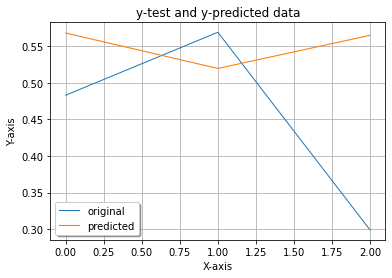

<Figure size 432x288 with 0 Axes>

In [92]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_prediction, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.savefig('bos_graph')

# Creating the table

In [83]:
#ML_table = pd.DataFrame(columns = ['Team', 'W/L Score', 'R-squared training', 'R-squared testing', 'MSE', 'RMSE'])
#ML_table

,Team,W/L Score,R-squared training,R-squared testing,MSE,RMSE


In [93]:
# Create variables for table
MSE = mse
RMSE = mse*(1/2.0)
R_training = rfr.score(X_train_scaled, y_train)
R_test = rfr.score(X_test_scaled, y_test)
Score = y_prediction[0].round(decimals=3)
print(MSE)
print(RMSE)
print(R_training)
print(R_test)

0.026773165665666825
0.013386582832833413
0.8464716755564331
0.6141107494481097


In [94]:
# Append data into table
dict = {'Team': "ATL", 'W/L Score':Score, 'R-squared training':R_training, 'R-squared testing':R_test, 'MSE':MSE, 'RMSE':RMSE}
ML_table = ML_table.append(dict, ignore_index = True)
ML_table

C:\Users\kounn\AppData\Local\Temp\ipykernel_15860\1750283774.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_table = ML_table.append(dict, ignore_index = True)


,Team,W/L Score,R-squared training,R-squared testing,MSE,RMSE
0,ATL,0.568,0.846472,0.614111,0.026773,0.013387
1,ATL,0.568,0.846472,0.614111,0.026773,0.013387
